# Drug Classification

#### Model - Random Forest

#### Content:
The target feature is
- Drug

The feature sets are:
- Age
- Sex
- BP
- Cholesterol
- Na_to_K

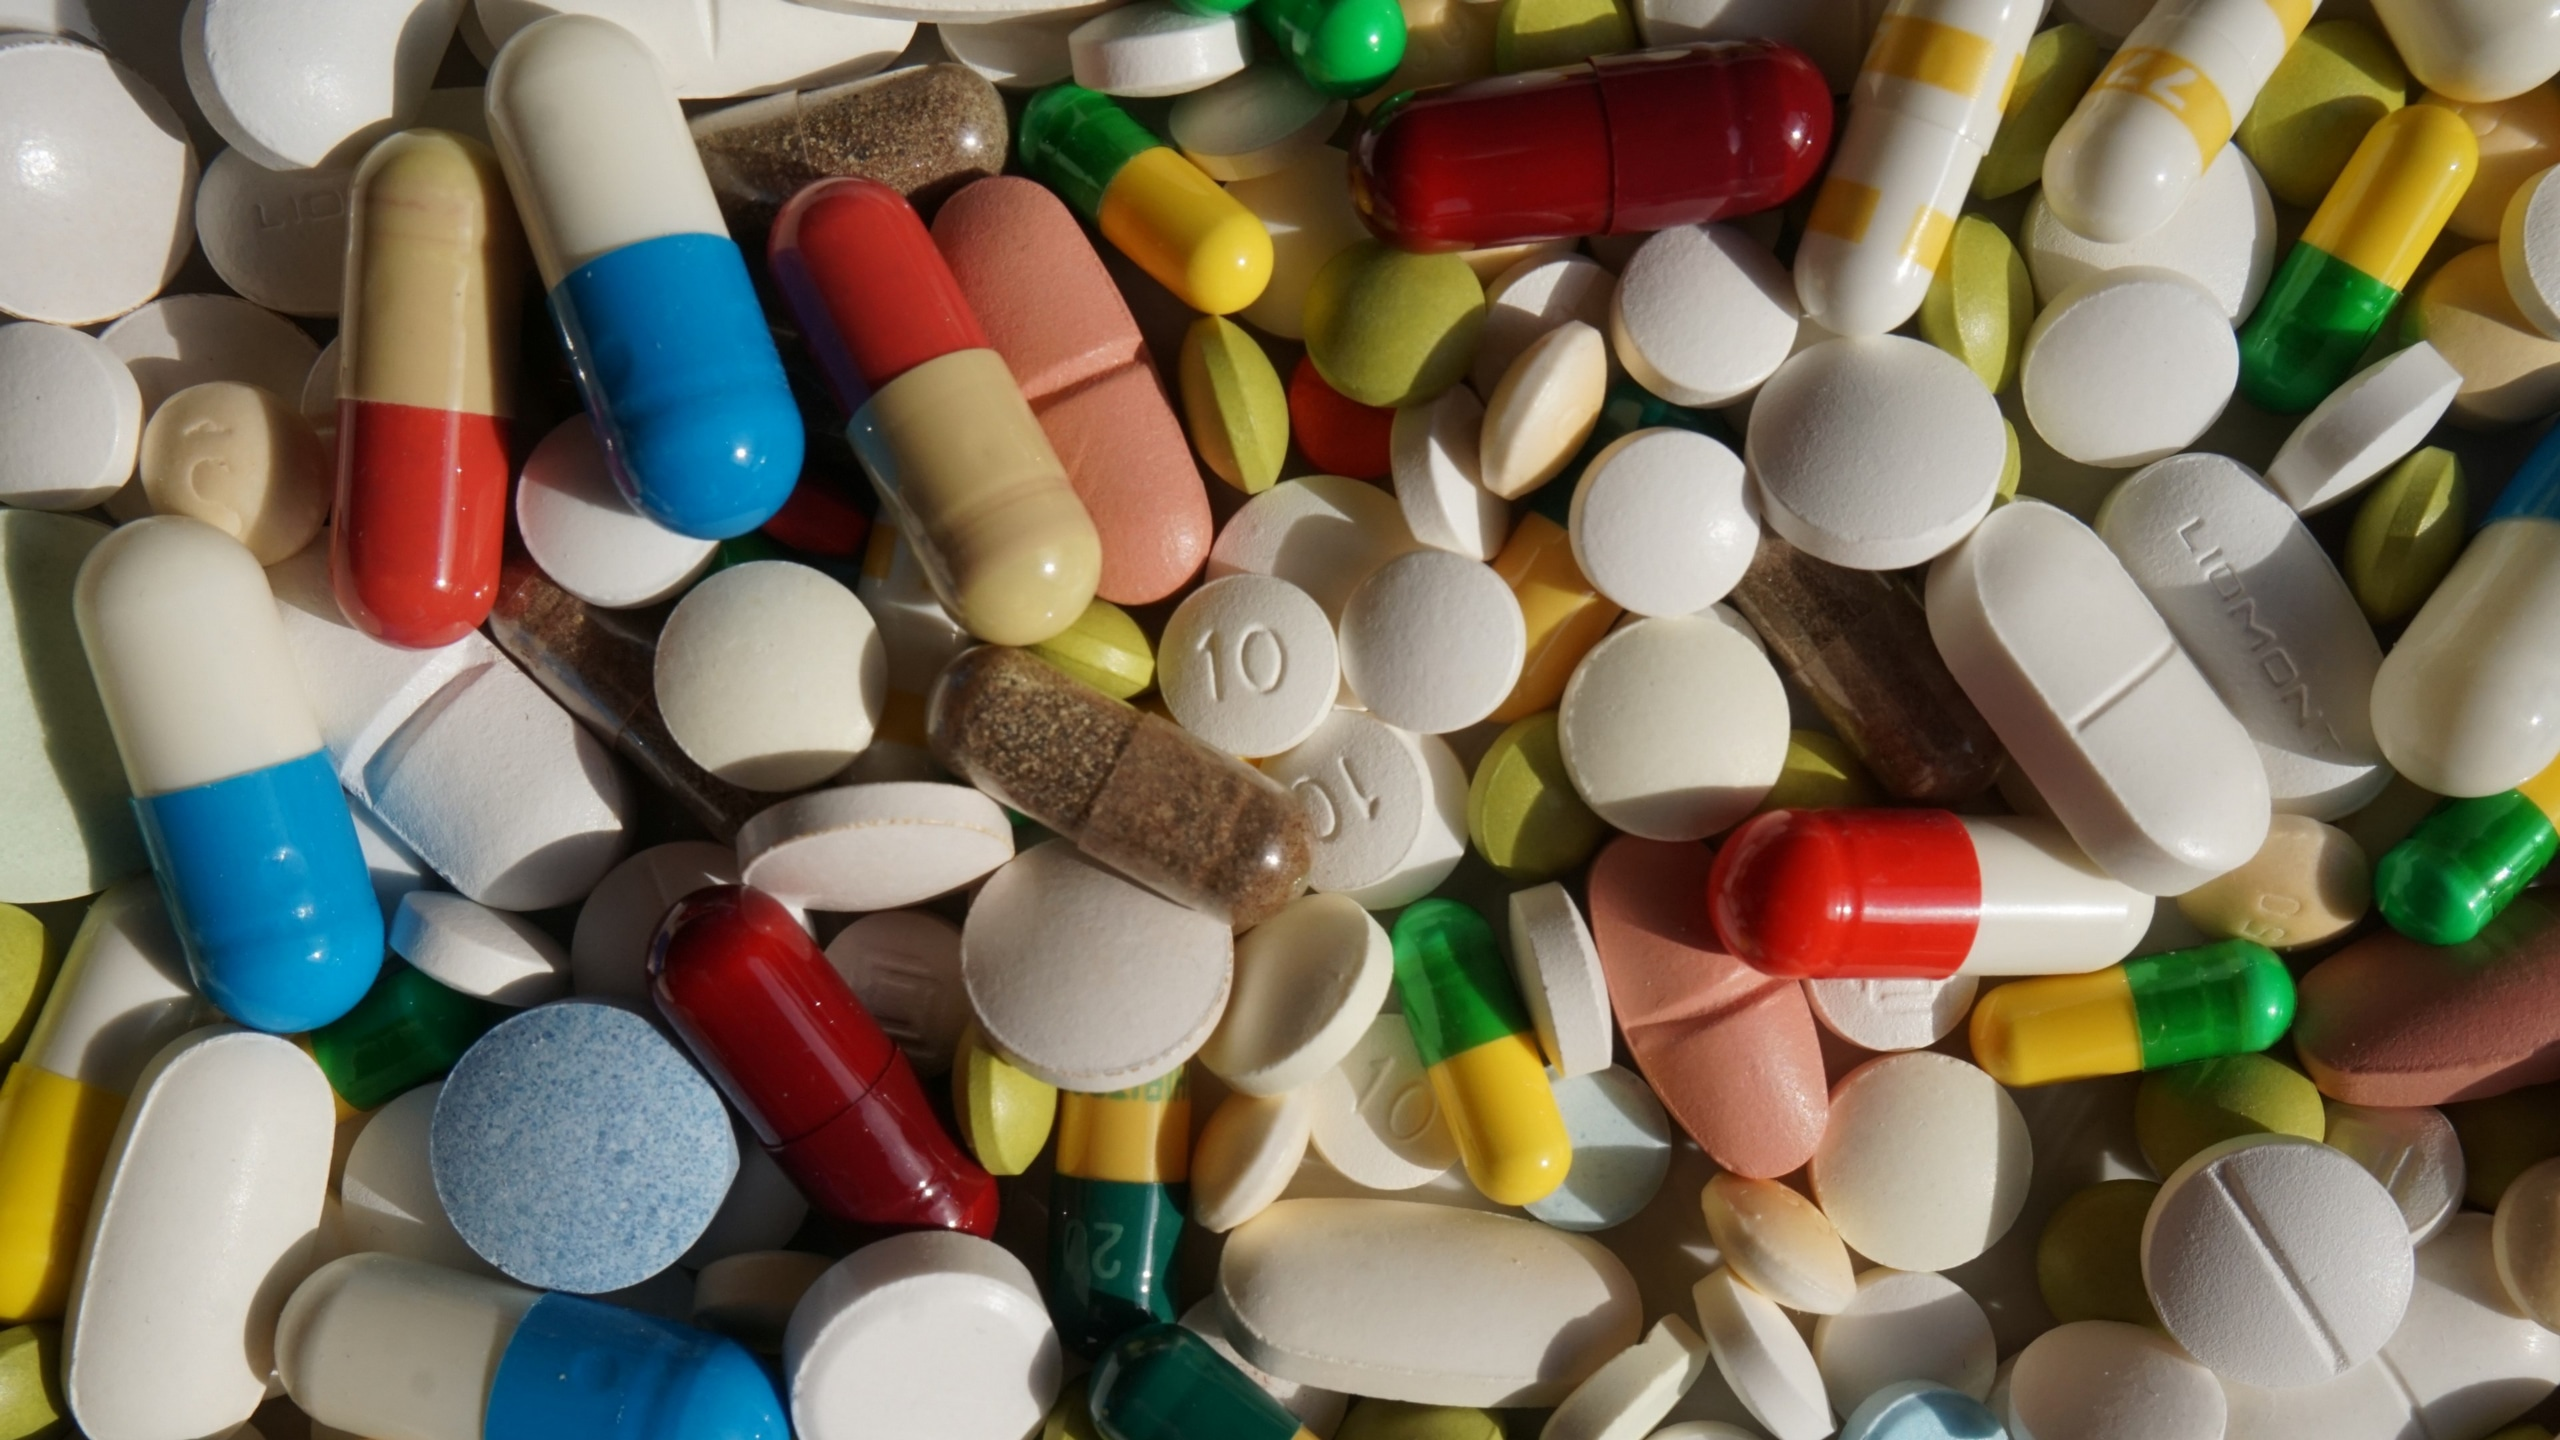


# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/decision-tree/Decision tree.ipynb
/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


# Data reading

In [2]:
df=pd.read_csv(r'/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Assess the first & last  five rows

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


# Check null & duplicated values

In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Convert the categorical columns to numerical columns

In [8]:
df.Sex=df.Sex.replace({'M':0,'F':1})
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [9]:
df.BP=df.BP.replace({'HIGH':4,'NORMAL':3,'LOW':2})
df.Cholesterol=df.Cholesterol.replace({'NORMAL':0,'HIGH':1})
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,4,1,25.355,drugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,3,1,7.798,drugX
4,61,1,2,1,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,3,1,9.894,drugX
198,23,0,3,0,14.020,drugX


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


# Statistical Information about the Data

In [11]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.480000,3.065000,0.515000,16.084485
std,16.544315,0.500854,0.839224,0.501029,7.223956
min,15.000000,0.000000,2.000000,0.000000,6.269000
25%,31.000000,0.000000,2.000000,0.000000,10.445500
50%,45.000000,0.000000,3.000000,1.000000,13.936500
75%,58.000000,1.000000,4.000000,1.000000,19.380000
max,74.000000,1.000000,4.000000,1.000000,38.247000


# Analysis of Data

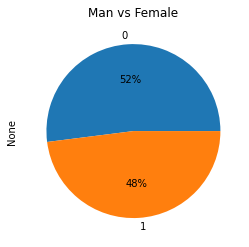

In [12]:
import matplotlib.pyplot as plt
plt.title('Man vs Female')
df.groupby('Sex').size().plot(kind='pie',autopct='%1.0f%%')
plt.show()

### Observation¶
- 52% of the people were Male's
- 48% of the people were Female's

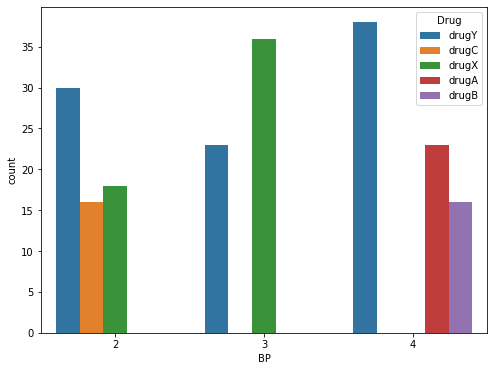

In [13]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,6))
sns.countplot('BP',data=df,hue='Drug')
plt.show()

## Observation
- NORMAL=3,LOW=2,HIGH=4
- Drug Y used by all the category people and Mostly used by the people who is having HIGH BP.
- Drug C used by the people who is having LOW BP.
- Drug X used by the people who is having NORMAL and LOW BP.
- Drug A and B used by the people who is having HIGH BP.

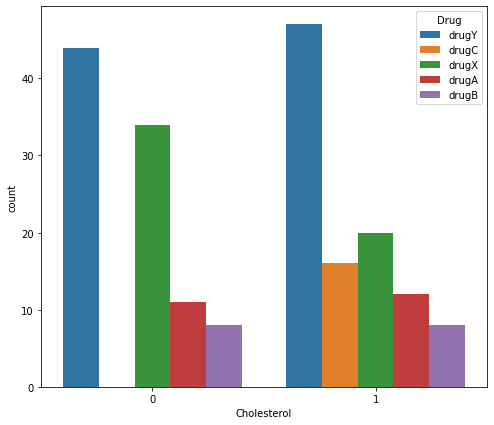

In [14]:
plt.figure(figsize=(8,7))
sns.countplot('Cholesterol',data=df,hue='Drug')
plt.show()

## Observation
- NORMAL=0,HIGH=1
-Drug Y have been used by all the category people, Mostly used by the people who is having HIGH Cholesterol
- Drug X have been used by all the category people, Mostly used by the people who is having NORMAL Cholesterol
- Drug A have been used by all the category people, Mostly used by the people who is having HIGH Cholesterol
- Drug B have been used by all the category people
- Drug C have been used by the people who is having HIGH Cholesterol

# Creation Model
Take the X and y value

In [15]:
x=df.drop('Drug',axis=1)
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,4,1,25.355
1,47,0,2,1,13.093
2,47,0,2,1,10.114
3,28,1,3,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,0,2,1,12.006
197,52,0,3,1,9.894
198,23,0,3,0,14.020


In [16]:
y=df.Drug
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

# Counts the values

In [17]:
y.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

# Split the data into 80% & 20%

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 5)
(40, 5)
(160,)
(40,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

# Fitting the training data to the model

In [21]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_prediction=model.predict(x_test)
y_prediction

array(['drugY', 'drugY', 'drugB', 'drugY', 'drugA', 'drugX', 'drugB',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB', 'drugX',
       'drugY', 'drugY', 'drugA', 'drugX', 'drugY', 'drugA', 'drugC',
       'drugX', 'drugX', 'drugB', 'drugC', 'drugY', 'drugA', 'drugA',
       'drugY', 'drugC', 'drugB', 'drugA', 'drugA'], dtype=object)

# Accuracy 

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)*100

100.0

- Overall Accuracy = 100%

In [24]:
df=pd.DataFrame({'Actual':y_test,"Predicted":y_prediction})
df

,Actual,Predicted
133,drugY,drugY
179,drugY,drugY
108,drugB,drugB
178,drugY,drugY
150,drugA,drugA
79,drugX,drugX
136,drugB,drugB
92,drugY,drugY
45,drugX,drugX
121,drugY,drugY


# Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
performance=confusion_matrix(y_test,y_prediction)
performance

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 10,  0],
       [ 0,  0,  0,  0, 15]])

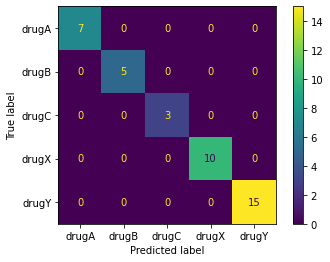

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [27]:
c_f=pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
c_f

Predicted,drugA,drugB,drugC,drugX,drugY
Actual,,,,,
drugA,7,0,0,0,0
drugB,0,5,0,0,0
drugC,0,0,3,0,0
drugX,0,0,0,10,0
drugY,0,0,0,0,15


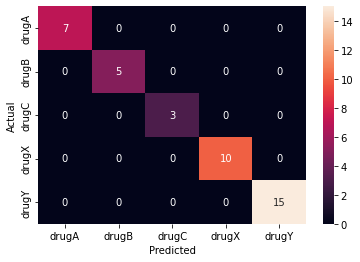

In [28]:
import seaborn as sns
sns.heatmap(c_f,annot=True)
plt.show()

# Plot  DecisionTree

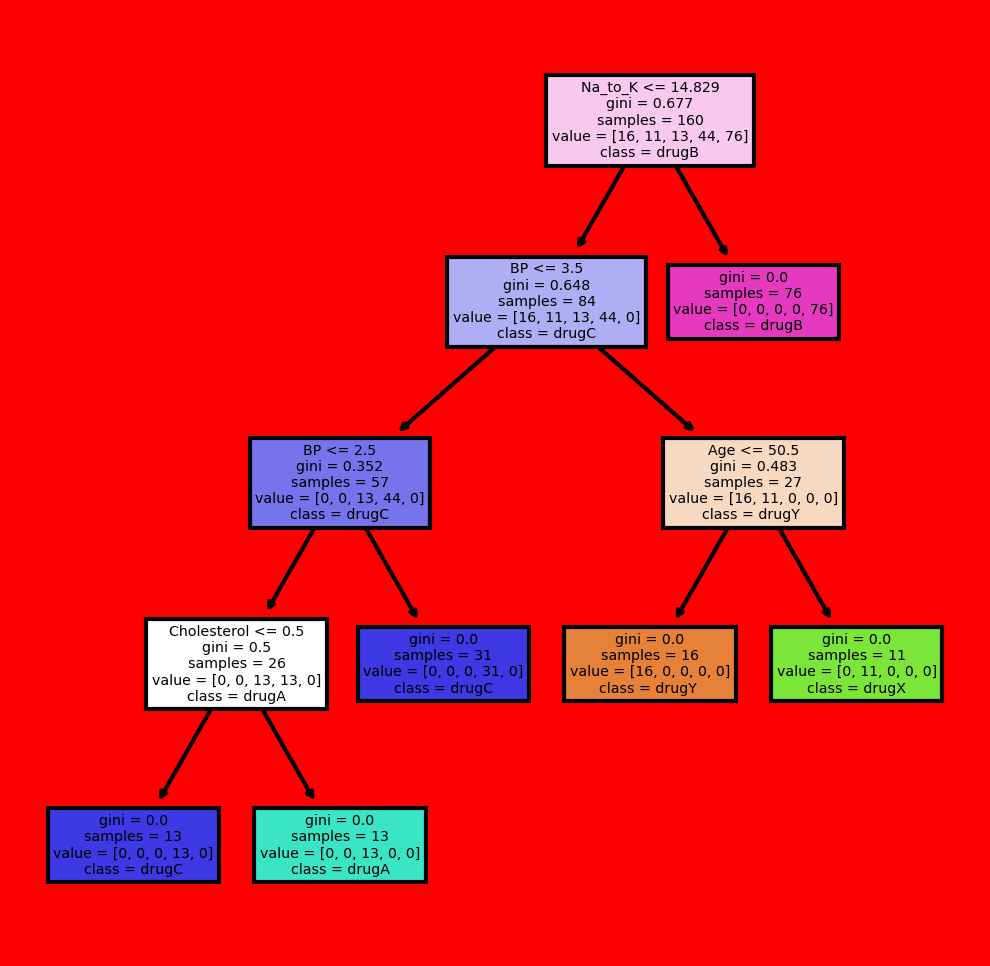

In [29]:
from sklearn import tree
feature_names=['Age','Sex','BP','Cholesterol','Na_to_K']
class_names=['drugY ','drugX','drugA','drugC','drugB']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300,facecolor='r')
tree.plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)
fig.savefig('drug200.png')